Q3: Latin Alphabet
motahare hazrati
400206613

In [21]:

import numpy as np 
import pandas as pd 
import os
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras import Sequential
import random
from PIL import ImageDraw, Image, ImageFont
from matplotlib import pyplot as plt

In [19]:

csv_train = pd.read_csv('Q3_train.csv', sep=',', skiprows=1, header=None)
x_df = csv_train.drop(csv_train.columns[0], axis=1).div(255).to_numpy()
y_df = csv_train.drop(csv_train.columns[1:], axis=1)
XX = []
for row in x_df:
    XX.append(np.reshape(row, (28, 28)))
x_train=np.array(XX)
y_train=y_df[0].to_numpy()


 A)
nine randomly selected images are
being displayed

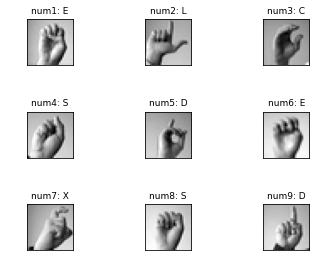

In [22]:

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
          'T', 'U', 'V', 'W', 'X', 'Y']

for index, picture in enumerate(x_train):
    
    if index < 9:
        ind=random.randint(1,27455)
        picture=x_train[ind]
        img = Image.fromarray(np.uint8(picture * 255), 'L')
        plt.subplot(3, 3, index+1)
        plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
        plt.subplots_adjust(bottom=0.1, top=0.9, wspace=None, hspace=1)
        plt.title("num"+str(index+1) + ": " + str(labels[y_train[ind]]), fontsize=9)
        plt.imshow(img, cmap='gray')
    else:
        break
plt.show()

In [23]:
train=pd.read_csv('Q3_train.csv')
test=pd.read_csv('Q3_test.csv')
X_train=train.drop(columns=["label"])
y_train=train["label"]
y_train=keras.utils.to_categorical(y_train,25)
X_test=test.drop(columns=["label"])
y_test=test["label"]
y_test=keras.utils.to_categorical(y_test,25)
X_train=np.array(X_train,dtype="float32")
X_test=np.array(X_test,dtype="float32")
X_train/=255
X_test/=255

b)
creating model
it has 4 layers with ReLU activation function and no drop out


In [32]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,),name="first_layer"))
model.add(Dense(512,activation="relu",name="second_layer"))
model.add(Dense(128,activation="relu",name="third_layer"))
model.add(Dense(64,activation="relu",name="fourth_layer"))
model.add(Dense(25,activation="softmax",name="output_layer"))

In [25]:
model.compile(optimizer="ADAM",loss="categorical_crossentropy",metrics=["accuracy"])

In [26]:
history =model.fit(X_train,y_train,epochs=30,batch_size=100,validation_split=0.2)

Epoch 1/30
220/220 [==============================] - 6s 23ms/step - loss: 2.6942 - accuracy: 0.1650 - val_loss: 1.8339 - val_accuracy: 0.3968
Epoch 2/30
220/220 [==============================] - 4s 18ms/step - loss: 1.7361 - accuracy: 0.4124 - val_loss: 1.1891 - val_accuracy: 0.5999
Epoch 3/30
220/220 [==============================] - 4s 18ms/step - loss: 1.2290 - accuracy: 0.5680 - val_loss: 0.8866 - val_accuracy: 0.6982
Epoch 4/30
220/220 [==============================] - 5s 22ms/step - loss: 0.9085 - accuracy: 0.6769 - val_loss: 0.5746 - val_accuracy: 0.8008
Epoch 5/30
220/220 [==============================] - 4s 17ms/step - loss: 0.6518 - accuracy: 0.7700 - val_loss: 0.3764 - val_accuracy: 0.8738
Epoch 6/30
220/220 [==============================] - 4s 17ms/step - loss: 0.5362 - accuracy: 0.8080 - val_loss: 0.3630 - val_accuracy: 0.8778
Epoch 7/30
220/220 [==============================] - 5s 22ms/step - loss: 0.4044 - accuracy: 0.8575 - val_loss: 0.2552 - val_accuracy: 0.9128

In [30]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy with ADAM no dropout')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss with ADAM no dropout')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    plt.show()

B) sgd and adam


as we can see ADAM is way more faster 
SGD needs more epochs to be trained

<ipython-input-30-5b3b798fcc93>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-30-5b3b798fcc93>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


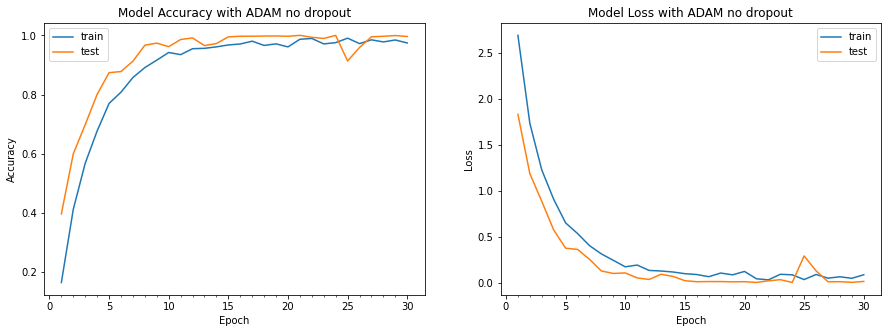

In [31]:
plot_model_history(history)

In [33]:
model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics=["accuracy"])

In [34]:
history =model.fit(X_train,y_train,epochs=30,batch_size=100,validation_split=0.2)

Epoch 1/30
220/220 [==============================] - 5s 19ms/step - loss: 3.1439 - accuracy: 0.0779 - val_loss: 3.0328 - val_accuracy: 0.1340
Epoch 2/30
220/220 [==============================] - 3s 15ms/step - loss: 2.9423 - accuracy: 0.1428 - val_loss: 2.7260 - val_accuracy: 0.2147
Epoch 3/30
220/220 [==============================] - 4s 20ms/step - loss: 2.6565 - accuracy: 0.2026 - val_loss: 2.3661 - val_accuracy: 0.3646
Epoch 4/30
220/220 [==============================] - 5s 21ms/step - loss: 2.3839 - accuracy: 0.2614 - val_loss: 2.0156 - val_accuracy: 0.4520
Epoch 5/30
220/220 [==============================] - 5s 21ms/step - loss: 2.1702 - accuracy: 0.3119 - val_loss: 1.9862 - val_accuracy: 0.4099
Epoch 6/30
220/220 [==============================] - 6s 26ms/step - loss: 2.0018 - accuracy: 0.3588 - val_loss: 1.6668 - val_accuracy: 0.4793
Epoch 7/30
220/220 [==============================] - 4s 17ms/step - loss: 1.8608 - accuracy: 0.3995 - val_loss: 1.6401 - val_accuracy: 0.4699

In [35]:
#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy with SGD no dropout')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss with SGD no dropout')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    plt.show()

<ipython-input-35-39fbad6fee0a>:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-35-39fbad6fee0a>:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


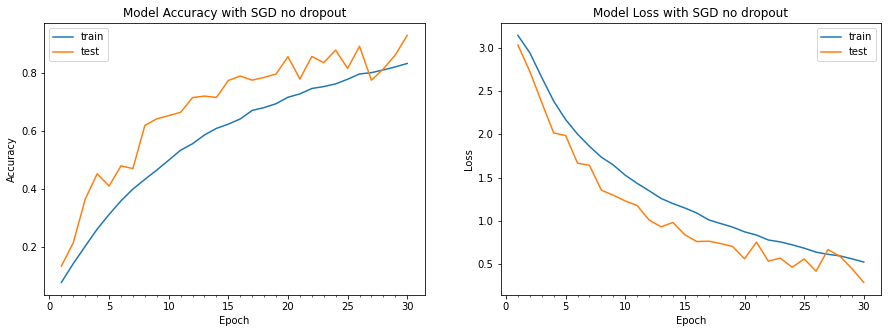

In [36]:
plot_model_history(history)

g)
as we can see, with ADAM optimizer, dropout made it be trained better and regularized the model.

In [43]:
model=Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,),name="first_layer"))
model.add(Dropout(0.2))
model.add(Dense(512,activation="relu",name="second_layer"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu",name="third_layer"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu",name="fourth_layer"))
model.add(Dropout(0.2))
model.add(Dense(25,activation="softmax",name="output_layer"))


model.compile(optimizer="ADAM",loss="categorical_crossentropy",metrics=["accuracy"])
history =model.fit(X_train,y_train,epochs=30,batch_size=100,validation_split=0.2)

#1. Function to plot model's validation loss and validation accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy with SGD WITH dropout')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss with SGD WITH  dropout')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    plt.show()

Epoch 1/30
220/220 [==============================] - 7s 25ms/step - loss: 2.8441 - accuracy: 0.1232 - val_loss: 2.0710 - val_accuracy: 0.3315
Epoch 2/30
220/220 [==============================] - 5s 24ms/step - loss: 1.9807 - accuracy: 0.3259 - val_loss: 1.4901 - val_accuracy: 0.5017
Epoch 3/30
220/220 [==============================] - 4s 19ms/step - loss: 1.5626 - accuracy: 0.4572 - val_loss: 1.0657 - val_accuracy: 0.6261
Epoch 4/30
220/220 [==============================] - 4s 19ms/step - loss: 1.3375 - accuracy: 0.5318 - val_loss: 0.8700 - val_accuracy: 0.7079
Epoch 5/30
220/220 [==============================] - 5s 24ms/step - loss: 1.1498 - accuracy: 0.5977 - val_loss: 0.7452 - val_accuracy: 0.7587
Epoch 6/30
220/220 [==============================] - 4s 19ms/step - loss: 1.0463 - accuracy: 0.6314 - val_loss: 0.6612 - val_accuracy: 0.7571
Epoch 7/30
220/220 [==============================] - 5s 22ms/step - loss: 0.9478 - accuracy: 0.6672 - val_loss: 0.5661 - val_accuracy: 0.7880

<ipython-input-38-dcf98e247d9d>:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-38-dcf98e247d9d>:33: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


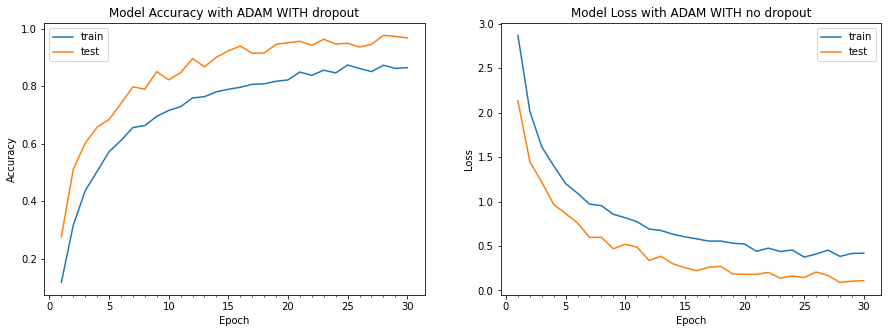

In [39]:
plot_model_history(history)

<ipython-input-40-0c2b7882e5e6>:25: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-40-0c2b7882e5e6>:33: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


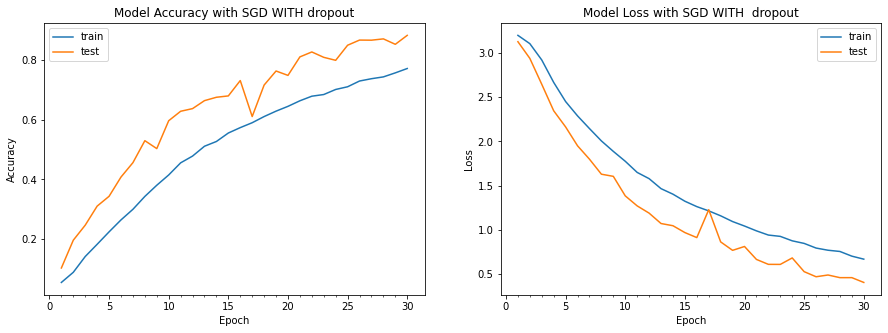

In [41]:
plot_model_history(history)

D)
best model was trained had Test_Acuuracy= 73%
the model was trained using ADAM optimizer and 0.2 dropout for each layer
 

In [44]:
test=model.evaluate(X_test,y_test)


225/225 [==============================] - 1s 4ms/step - loss: 0.8613 - accuracy: 0.7358


In [17]:
from keras.models import load_model

model.save('my_model.h5') 